In [8]:
import pandas as pd
import numpy as np
import os
import sys
from time import time
from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy import constants 
from astropy.coordinates import SkyCoord
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular

In [9]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm

from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [10]:
#from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [11]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

In [12]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [ ]:
https://johannesbuchner.github.io/UltraNest/example-line.html

# Tutorial fitting a line

In [1]:
import numpy as np
# Black hole data from Kormendy & Ho (2014) https://arxiv.org/abs/1304.7762 https://arxiv.org/abs/1308.6483
# Bulge mass and error (log Msun)
mB = np.array([9.05, 11.84, 11.27, 10.65, 11.5, 11.74, 11.33, 10.26, 11.06, 11.61, 10.5, 10.91, 11.26, 11.01, 11.77, 11.65, 10.85, 11.62, 11.51, 10.88, 11.84, 10.85, 11.72, 9.64, 11.64, 10.97, 11.16, 12.09, 11.28, 11.05, 11.65, 11.6, 11.0, 10.57, 11.69, 11.25, 11.61, 11.65, 11.75, 11.6, 11.81, 11.78])
mBerr = np.array([0.1, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1, 0.09, 0.09, 0.09, 0.1, 0.09])
# Black hole mass, errors, and magnitude
mBH = np.log10([2.45e+06, 1.69e+08, 1.47e+09, 5.90e+08, 8.81e+08, 4.65e+09, 3.87e+09,
 1.45e+07, 1.08e+07, 3.72e+09, 1.78e+08, 4.16e+08, 1.37e+08, 4.65e+08,
 9.09e+09, 5.29e+08, 9.78e+08, 9.25e+08, 1.30e+07, 6.96e+07, 2.54e+09,
 9.00e+07, 6.15e+09, 6.00e+08, 4.72e+09, 2.02e+08, 1.71e+09, 2.08e+10,
 8.55e+08, 5.69e+07, 4.75e+09, 3.69e+09, 2.73e+08, 4.87e+08, 3.74e+09,
 2.10e+09, 3.96e+08, 2.30e+09, 1.34e+09, 2.48e+09, 3.74e+09, 1.30e+09])
mBHlo = np.log10([1.43e+06, 1.39e+08, 1.27e+09, 5.39e+08, 4.35e+08, 4.24e+09, 3.16e+09,
 0.10e+07, 1.03e+07, 3.21e+09, 8.50e+07, 3.12e+08, 9.00e+07, 3.66e+08,
 6.28e+09, 4.21e+08, 6.70e+08, 8.38e+08, 0.10e+07, 5.62e+07, 2.44e+09,
 4.50e+07, 5.78e+09, 4.00e+08, 3.67e+09, 1.52e+08, 1.52e+09, 4.90e+09,
 4.07e+08, 4.65e+07, 2.81e+09, 2.65e+09, 1.94e+08, 3.34e+08, 2.59e+09,
 2.00e+09, 2.40e+08, 2.19e+09, 9.30e+08, 2.29e+09, 3.22e+09, 1.11e+09])
mBHhi = np.log10([3.460e+06, 1.970e+08, 1.680e+09, 6.510e+08, 1.781e+09, 5.380e+09,
 4.480e+09, 2.910e+07, 1.120e+07, 3.830e+09, 2.720e+08, 5.200e+08,
 1.820e+08, 5.640e+08, 1.143e+10, 6.360e+08, 1.286e+09, 1.023e+09,
 2.240e+08, 8.290e+07, 3.120e+09, 1.350e+08, 6.530e+09, 9.000e+08,
 5.760e+09, 2.530e+08, 1.810e+09, 3.660e+10, 1.293e+09, 6.730e+07,
 5.630e+09, 3.790e+09, 3.410e+08, 6.400e+08, 5.500e+09, 2.730e+09,
 6.720e+08, 3.450e+09, 1.850e+09, 2.960e+09, 4.160e+09, 1.500e+09])

# Velocity dispersion and error (km/s)
sigma = np.array([77.0, 226.0, 328.0, 167.0, 315.0, 276.0, 270.0, 175.0, 166.0, 297.0, 145.0, 206.0, 229.0, 182.0, 270.0, 315.0, 242.0, 296.0, 182.0, 167.0, 300.0, 190.0, 324.0, 185.0, 380.0, 177.0, 355.0, 347.0, 222.0, 150.0, 333.0, 328.0, 183.0, 239.0, 318.0, 389.0, 266.0, 292.0, 257.0, 331.0, 288.0, 322.0])
sigmaerr = np.array([3.0, 9.0, 9.0, 3.0, 3.0, 2.0, 10.0, 8.0, 16.0, 12.0, 7.0, 10.0, 11.0, 9.0, 27.0, 15.0, 12.0, 14.0, 5.0, 8.0, 7.0, 9.0, 28.0, 9.0, 19.0, 8.0, 14.0, 5.0, 11.0, 7.0, 2.0, 11.0, 9.0, 11.0, 2.0, 3.0, 13.0, 5.0, 26.0, 5.0, 14.0, 16.0])

n_data = len(mBerr)

## Bulge velocity

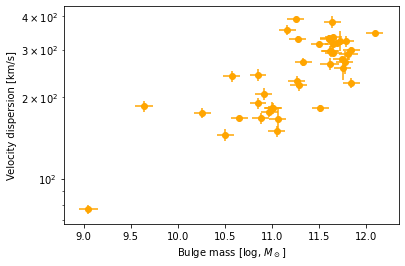

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
xlabel = 'Bulge mass [log, $M_\odot$]'
ylabel = 'Velocity dispersion [km/s]'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.errorbar(x=mB, xerr=mBerr, y=sigma, yerr=sigmaerr,
             marker='o', ls=' ', color='orange')
plt.yscale('log')

Text(0, 0.5, 'Velocity dispersion [log, km/s]')

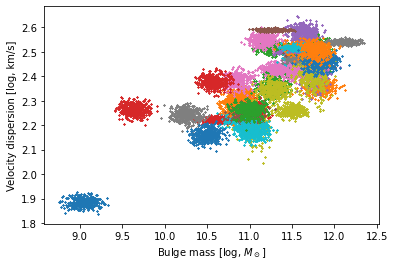

In [3]:
samples = []

plt.figure()
for i in range(n_data):
    # draw normal random points

    # scale according to error bars and values
    samples_mBi = np.random.normal(mB[i], mBerr[i], size=400)

    # same for sigma
    samples_sigmai = np.random.normal(sigma[i], sigmaerr[i], size=400)

    # we will work in log-sigma:
    samples_logsigmai = np.log10(samples_sigmai)

    samples.append([samples_mBi, samples_logsigmai])

    # for each galaxy, plot alittle cloud with its own colors
    plt.scatter(samples_mBi, samples_logsigmai, s=2, marker='x')

samples = np.array(samples)
xlabel = 'Bulge mass [log, $M_\odot$]'
ylabel = 'Velocity dispersion [log, km/s]'
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [4]:
samples.shape

(42, 2, 400)

In [5]:
parameters = ['slope', 'offset', 'scatter']

def prior_transform(cube):
    # the argument, cube, consists of values from 0 to 1
    # we have to convert them to physical scales

    params = cube.copy()
    # let slope go from -3 to +3
    lo = -3
    hi = +3
    params[0] = cube[0] * (hi - lo) + lo
    # let offset go from 10 to 1000 km/s -- use log
    lo = np.log10(10)
    hi = np.log10(1000)
    params[1] = cube[1] * (hi - lo) + lo
    # let scatter go from 0.001 to 10
    lo = np.log10(0.001)
    hi = np.log10(10)
    params[2] = 10**(cube[2] * (hi - lo) + lo)
    return params

In [6]:
import scipy.stats

def log_likelihood(params):
    # unpack the current parameters:
    slope, offset, scatter = params

    # compute for each x point, where it should lie in y
    y_expected = (samples[:,0] - 10) * slope + offset
    # compute the probability of each sample
    probs_samples = scipy.stats.norm(y_expected, scatter).pdf(samples[:,1])
    # average over each galaxy, because we assume one of the points is the correct one (logical OR)
    probs_objects = probs_samples.mean(axis=1)
    assert len(probs_objects) == n_data
    # multiply over the galaxies, because we assume our model holds true for all objects (logical AND)
    # for numerical stability, we work in log and avoid zeros
    loglike = np.log(probs_objects + 1e-100).sum()
    return loglike

In [8]:
import ultranest

sampler = ultranest.ReactiveNestedSampler(parameters, log_likelihood, prior_transform)

In [9]:
result = sampler.run(min_num_live_points=50, min_ess=100) # you can increase these numbers later

[ultranest] To achieve the desired logz accuracy, min_num_live_points was increased to 64
[ultranest] Sampling 64 live points from prior ...


[ultranest] Explored until L=4e+01  41.3546..41.3849] | it/evals=1116/2829 eff=40.3617% N=64   4  4  
[ultranest] Likelihood function evaluations: 2830
[ultranest] Will add 16 live points (x1) at L=4e+01 ...
[ultranest] Explored until L=4e+01  41.3227..41.3566] | it/evals=1090/2914 eff=47.6190% N=80 
[ultranest] Likelihood function evaluations: 2914
[ultranest]   logZ = 29.25 +- 0.2827
[ultranest] Effective samples strategy satisfied (ESS = 333.2, need >100)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 62 minimum live points (dlogz from 0.20 to 0.84, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.


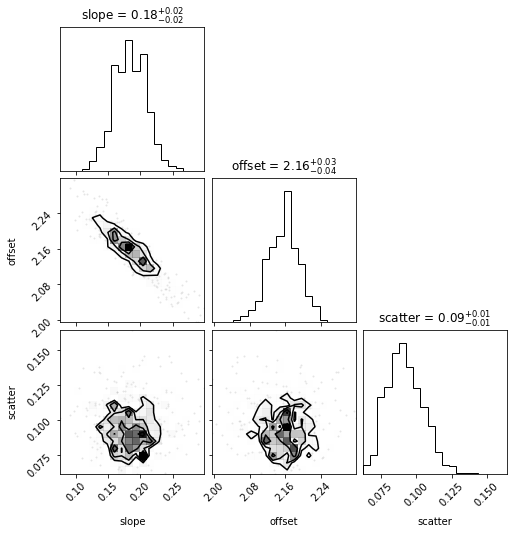

In [10]:
from ultranest.plot import cornerplot
cornerplot(sampler.results)

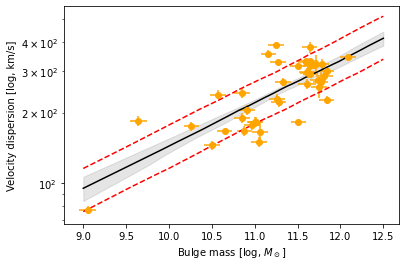

In [11]:
plt.figure()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.errorbar(x=mB, xerr=mBerr, y=sigma, yerr=sigmaerr,
             marker='o', ls=' ', color='orange')

from ultranest.plot import PredictionBand
x = np.linspace(9, 12.5, 400)
band = PredictionBand(x)
band_lo = PredictionBand(x)
band_hi = PredictionBand(x)

for params in sampler.results['samples'][:40]:
    slope, offset, scatter = params
    y = (x - 10) * slope + offset
    band.add(10**y)

    # indicate intrinsic scatter
    band_hi.add(10**(y + scatter))
    band_lo.add(10**(y - scatter))

band.shade(color='k', alpha=0.1)
band.line(color='k')
band_lo.line(color='r', ls='--')
band_hi.line(color='r', ls='--')

plt.yscale('log');


Text(0, 0.5, 'Posterior probability')

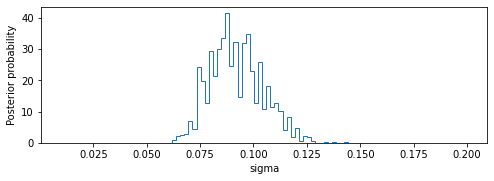

In [12]:
scatter_samples = result['weighted_samples']['points'][:,2]
weights = result['weighted_samples']['weights']

plt.figure(figsize=(8, 2.5))

bins=np.linspace(0.01, 0.2, 100)
plt.hist(scatter_samples, weights=weights, bins=bins, density=True, histtype='step')

plt.xlabel('sigma')
plt.ylabel("Posterior probability")


In [13]:
result['weighted_samples']['bootstrapped_weights'].shape

(1223, 30)

In [15]:
from fastkde import fastKDE

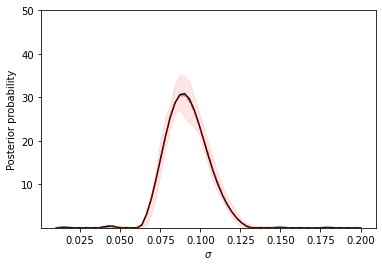

In [16]:
plt.figure()
bins=np.linspace(0.01, 0.2, 64+1)
scatter_samples = result['samples'][:,2]

pdf, _ = fastKDE.pdf(scatter_samples, axes=(bins,))
plt.plot(bins, pdf, color='k')

from ultranest.plot import PredictionBand
from ultranest.integrator import resample_equal
band = PredictionBand(bins)

for weights in result['weighted_samples']['bootstrapped_weights'].transpose():
    scatter_samples = resample_equal(result['weighted_samples']['points'][:,2], weights)
    pdf, _ = fastKDE.pdf(scatter_samples, axes=(bins,))
    band.add(pdf)

band.line(ls='--', color='r', alpha=0.5)
band.shade(0.49, color='r', alpha=0.1)


plt.xlabel('$\sigma$')
plt.ylabel("Posterior probability")
#plt.yscale('log')
plt.ylim(1e-3, 50);

In [17]:
parameters0 = ['offset', 'scatter']

def prior_transform0(cube):
    params = cube.copy()
    # let offset go from 10 to 1000 km/s -- use log
    lo = np.log10(10)
    hi = np.log10(1000)
    params[0] = cube[0] * (hi - lo) + lo
    # let scatter go from 0.001 to 10
    lo = np.log10(0.001)
    hi = np.log10(10)
    params[1] = 10**(cube[1] * (hi - lo) + lo)
    return params


def log_likelihood0(params):
    # unpack the current parameters:
    offset, scatter = params

    # compute for each x point, where it should lie in y
    y_expected = offset
    # compute the probability of each sample
    probs_samples = scipy.stats.norm(y_expected, scatter).pdf(samples[:,1])
    # average over each galaxy, because we assume one of the points is the correct one (logical OR)
    probs_objects = probs_samples.mean(axis=1)
    assert len(probs_objects) == n_data
    # multiply over the galaxies, because we assume our model holds true for all objects (logical AND)
    # for numerical stability, we work in log and avoid zeros
    loglike = np.log(probs_objects + 1e-100).sum()
    return loglike

In [18]:
sampler0 = ultranest.ReactiveNestedSampler(parameters0, log_likelihood0, prior_transform0)
result0 = sampler0.run()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  21.9442..21.9442]*| it/evals=4040/5659 eff=75.8129% N=347     7 7 
[ultranest] Likelihood function evaluations: 5688
[ultranest]   logZ = 14.84 +- 0.0829
[ultranest] Effective samples strategy satisfied (ESS = 1405.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.


Model comparison with AIC
Here we compute the Akaike information criterion (AIC). 
https://en.wikipedia.org/wiki/Akaike_information_criterion

The model with the lowest AIC should be preferred.

In [19]:
Lmax0 = result0['weighted_samples']['logl'].max()
AIC0 = -2 * Lmax0 + len(parameters0)

Lmax1 = result['weighted_samples']['logl'].max()
AIC1 = -2 * Lmax1 + len(parameters)

print("AIC of constant model: %d" % AIC0)
print("AIC of line model    : %d" % AIC1)

AIC of constant model: -41
AIC of line model    : -79


In [20]:
samples_orig = samples.copy()

In [21]:
from scipy.special import logsumexp

In [22]:
Kpredicts = []

for lo, hi in [(9, 9.5), (9.5, 10), (10, 10.5), (10.5, 11), (11, 11.5), (11.5, 12.2)]:
#for lo, hi in [(9, 10), (10, 11), (11, 12.2)]:
    # leave out samples within that interval
    excluded = np.logical_and(mB >= lo, mB < hi)
    # all the others are allowed
    included = ~excluded
    # set samples (used inside likelihood functions)
    samples = samples_orig[included]
    n_data = len(samples)

    # analyse with line model
    sampler1 = ultranest.ReactiveNestedSampler(parameters, log_likelihood, prior_transform)
    result1 = sampler1.run()

    # analyse with constant model
    sampler0 = ultranest.ReactiveNestedSampler(parameters0, log_likelihood0, prior_transform0)
    result0 = sampler0.run()

    # now set the samples to the withheld data
    samples = samples_orig[excluded]
    n_data = len(samples)
    # get the log of the mean likelihood from each model
    Zpredict0 = logsumexp([log_likelihood0(sample) for sample in result0['samples']])
    Zpredict1 = logsumexp([log_likelihood(sample) for sample in result1['samples']])

    Kpredicts.append(Zpredict1 - Zpredict0)

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=4e+01  40.6779..40.6780]*| it/evals=6240/11074 eff=58.2443% N=377        
[ultranest] Likelihood function evaluations: 11080
[ultranest]   logZ = 28.73 +- 0.1103
[ultranest] Effective samples strategy satisfied (ESS = 1841.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=3e+01  28.1814..28.1815]*| it/evals=3800/5446 eff=73.8208% N=325     5 5 
[ultranest] Likelihood function evaluations: 5457
[ultranest]   logZ = 21.11 +- 0.1017
[ultranest] Effective samples strategy satisfied (ESS = 1290.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=4e+01  42.3703..42.3707]*| it/evals=6080/10913 eff=57.4241% N=357     7   
[ultranest] Likelihood function evaluations: 10945
[ultranest]   logZ = 29.94 +- 0.1086
[ultranest] Effective samples strategy satisfied (ESS = 1751.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  21.2797..21.2797]*| it/evals=3856/5406 eff=75.8889% N=343     3 3 
[ultranest] Likelihood function evaluations: 5434
[ultranest]   logZ = 14.62 +- 0.101
[ultranest] Effective samples strategy satisfied (ESS = 1390.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=4e+01  39.9902..39.9902]*| it/evals=6280/11084 eff=58.5548% N=376     6   
[ultranest] Likelihood function evaluations: 11117
[ultranest]   logZ = 27.86 +- 0.1232
[ultranest] Effective samples strategy satisfied (ESS = 1821.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  21.4275..21.4276]*| it/evals=3960/5562 eff=75.4940% N=337     7 7 
[ultranest] Likelihood function evaluations: 5575
[ultranest]   logZ = 14.25 +- 0.1033
[ultranest] Effective samples strategy satisfied (ESS = 1351.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=3e+01  32.4805..32.4805]*| it/evals=6320/11454 eff=57.0653% N=388     8   
[ultranest] Likelihood function evaluations: 11492
[ultranest]   logZ = 20.8 +- 0.1241
[ultranest] Effective samples strategy satisfied (ESS = 1852.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  17.6853..17.6854]*| it/evals=3840/5383 eff=75.8981% N=342     2 2 
[ultranest] Likelihood function evaluations: 5422
[ultranest]   logZ = 10.99 +- 0.1186
[ultranest] Effective samples strategy satisfied (ESS = 1371.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=4e+01  36.8260..36.8261]*| it/evals=6466/11535 eff=57.9255% N=384   4   4 
[ultranest] Likelihood function evaluations: 11560
[ultranest]   logZ = 24.57 +- 0.1059
[ultranest] Effective samples strategy satisfied (ESS = 1911.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  6.4240..16.4240]*| it/evals=3600/5093 eff=75.1332% N=326    6 6 6 
[ultranest] Likelihood function evaluations: 5119
[ultranest]   logZ = 9.935 +- 0.1062
[ultranest] Effective samples strategy satisfied (ESS = 1299.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=2e+01  6.9414..16.9417]*| it/evals=5880/10572 eff=57.6976% N=389    =389 
[ultranest] Likelihood function evaluations: 10597
[ultranest]   logZ = 6.445 +- 0.1047
[ultranest] Effective samples strategy satisfied (ESS = 1928.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.10 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=1e+01  0.1174..10.1174]*| it/evals=3600/5067 eff=75.7446% N=335     5 5 
[ultranest] Likelihood function evaluations: 5086
[ultranest]   logZ = 3.949 +- 0.08813
[ultranest] Effective samples strategy satisfied (ESS = 1365.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.


In [23]:
Kpredicts

[7.098175171773816,
 -1.2563974393651964,
 1.2452261078115008,
 5.011437775215658,
 -0.10555237697464293,
 12.466880312597528]

In [24]:
np.mean(Kpredicts)

4.0766282585097775

## Bulge and BH mass

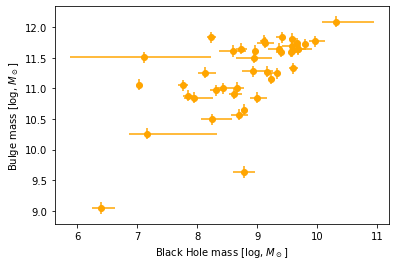

In [25]:
plt.figure()
plt.xlabel('Black Hole mass [log, $M_\odot$]')
plt.ylabel('Bulge mass [log, $M_\odot$]')
plt.errorbar(y=mB, yerr=mBerr, x=mBH, xerr=[mBHhi-mBH, mBH-mBHlo],
             marker='o', ls=' ', color='orange');


## tau-L

In [3]:
import pandas as pd
import numpy as np

In [4]:
timelag_sources_=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_lag/timelag_repair.xlsx',sheet_name='工作表2')
timelag_others=timelag_sources_[timelag_sources_['select']==2]
timelag_others['logLbol11']=np.log10(timelag_others['Lbol']/(3.828e26*10**7))-11

<ipython-input-4-115d767af581>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timelag_others['logLbol11']=np.log10(timelag_others['Lbol']/(3.828e26*10**7))-11


In [5]:
timelag_others

Name         z    type  logmass epoch          Lbol  Lsigma   band  \
67  NGC 2110  0.007789  Type 2      7.3   NaN  3.440000e+44     NaN  X-ray   

   refband  lag_lower timelag  lag_upper                  ref  \
67      W1       13.7   127.5       14.0  2020MNRAS.495.2921N   

           bol_method  select Note  logLbol11  
67  Lbol=8*LX(14-195)     2.0  NaN  -0.046413

### timelag_sources

In [82]:
timelag_sources=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_lag/timelag_repair.xlsx',sheet_name='工作表2')
timelag_sources=timelag_sources[timelag_sources['select']==1]
timelag_sources=timelag_sources.reset_index(drop=True)
timelag_sources['Lbol11']=timelag_sources['Lbol']/10**11/(3.828e26*10**7)
timelag_sources['logLbol11']=np.log10(timelag_sources['Lbol11'])


for i in range(len(timelag_sources)):  
    if timelag_sources['type'][i].split(' ')[0]=='CLAGN':
        timelag_sources.loc[i,'color']='g'
        timelag_sources.loc[i,'label']='CLAGN'

    elif timelag_sources['type'][i].split(' ')[1]=='2':
        timelag_sources.loc[i,'color']='b'
        timelag_sources.loc[i,'label']='Type2'

    else:
        timelag_sources.loc[i,'color']='r'
        timelag_sources.loc[i,'label']='Type1'

In [89]:
timelag_sources.columns

Index(['Name', 'z', 'type', 'logmass', 'epoch', 'Lsigma_lo', 'Lbol',
       'Lsigma_hi', 'band', 'refband', 'lag_lower', 'timelag', 'lag_upper',
       'ref', 'bol_method', 'select', 'Note', 'Lbol11', 'logLbol11', 'color',
       'label', 'OX'],
      dtype='object')

In [83]:
timelag_sources_text=timelag_sources[timelag_sources['ref'].str.contains('Thiswork')]
timelag_sources_text=drop_index(timelag_sources_text)
timelag_sources['OX']='O'
for i in range(len(timelag_sources)): 
    if timelag_sources['type'][i]=='CLAGN X':
        timelag_sources['OX'][i]='X'
#timelag_sources[timelag_sources['OX']=='O']

<ipython-input-83-555c2a7ffb63>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timelag_sources['OX'][i]='X'


In [84]:
timelag_sources

Name         z     type  logmass epoch     Lsigma_lo          Lbol  \
0     NGC 1566  0.005017    CLAGN     6.90   NaN  8.290000e+41  8.710000e+42   
1        Mrk 6  0.019513    CLAGN     8.18   NaN  2.000000e+43  3.900000e+44   
2      Mrk 926  0.047020    CLAGN     8.05   NaN  1.170000e+44  4.590000e+45   
3  PG 1535+547  0.038930  CLAGN X     7.34   NaN  1.400000e+44  1.400000e+45   
4     NGC 7469  0.016317  CLAGN X     7.32   NaN  1.250000e+43  3.390000e+44   
5     NGC 3516  0.008840    CLAGN     7.49   NaN  3.100000e+42  1.560000e+44   
6      Mrk 590  0.026380    CLAGN     7.50   NaN  3.400000e+43  1.360000e+44   
7     NGC 4051  0.002340  CLAGN X     6.36   NaN  1.670000e+41  4.100000e+42   
8     NGC 4151  0.003330    CLAGN     7.56   NaN  4.910000e+41  1.210000e+44   
9     NGC 5548  0.017175    CLAGN     7.51   NaN  1.210000e+43  4.600000e+44   

      Lsigma_hi band refband  ...  lag_upper       ref         bol_method  \
0  8.740000e+41    V      W1  ...       25.7  Thiswork  Lbol=8*LX(14-195)   
1  1.560000e+43    V      W1  ...       30.0  Thiswork  Lbol=8*LX(14-195)   
2  1.100000e+44    V      W1  ...       25.3  Thiswork  Lbol=8*LX(14-195)   
3  1.400000e+44    V      W1  ...       21.2  Thiswork         LOIII*3500   
4  1.160000e+43  NaN     NaN  ...       37.9  Thiswork  Lbol=8*LX(14-195)   
5  3.250000e+42    V      W1  ...       64.0  Thiswork  Lbol=8*LX(14-195)   
6  3.140000e+43    V      W1  ...       17.8  Thiswork  Lbol=8*LX(14-195)   
7  1.360000e+41    V      W1  ...       10.4  Thiswork  Lbol=8*LX(14-195)   
8  4.770000e+41    V      W1  ...       40.8  Thiswork  Lbol=8*LX(14-195)   
9  1.250000e+43    V      W1  ...       18.6  Thiswork  Lbol=8*LX(14-195)   

  select Note     Lbol11 logLbol11  color  label OX  
0    1.0  NaN   0.022753 -1.642954      g  CLAGN  O  
1    1.0  NaN   1.018809  0.008093      g  CLAGN  O  
2    1.0  NaN  11.990596  1.078841      g  CLAGN  O  
3    1.0  NaN   3.657262  0.563156      g  CLAGN  X  
4    1.0  NaN   0.885580 -0.052772      g  CLAGN  X  
5    1.0  NaN   0.407524 -0.389847      g  CLAGN  O  
6    1.0  NaN   0.355277 -0.449433      g  CLAGN  O  
7    1.0  NaN   0.010711 -1.970188      g  CLAGN  X  
8    1.0  NaN   0.316092 -0.500187      g  CLAGN  O  
9    1.0  NaN   1.201672  0.079786      g  CLAGN  O  

[10 rows x 22 columns]

In [53]:
timelag_PGQuasar=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_lag/timelag_repair.xlsx',sheet_name='PGquasars')
for index,tau in enumerate(timelag_PGQuasar['DtW1,c2 (7)']):   
    tau_w1,e_tau_w1=tau.replace('','').split('±')
    timelag_PGQuasar.loc[index,'tau_w1']=float(tau_w1)
    timelag_PGQuasar.loc[index,'e_tau_w1']=float(e_tau_w1)   
    
timelag_PGQuasar['logLbol11']=timelag_PGQuasar['LAGN,bol (4)']-11    

In [54]:
timelag_PGQuasar

Name (1)  z (2) Type (3)  LAGN,bol (4) loge(s) (5)  loge(t) (6)  \
0   PG 0003+158   0.45      HDD          13.3       −1.64         6.95   
1   PG 0003+199   0.03     Norm          11.2       −0.42         5.43   
2   PG 0007+106   0.09     Norm          11.9       −1.02         5.70   
3   PG 0026+129   0.14      HDD          12.4       −1.04         6.53   
4   PG 0043+039   0.38     HDD?          13.0       −2.30         4.60   
..          ...    ...      ...           ...         ...          ...   
82  PG 2214+139   0.07      WDD          11.9       −0.59         6.13   
83  PG 2233+134   0.32     Norm          12.7       −2.30         6.73   
84  PG 2251+113   0.32      WDD          12.9       −2.40         6.30   
85  PG 2304+042   0.04     Norm          10.6        0.11         2.66   
86  PG 2308+098   0.43      HDD          13.2       −1.11         7.68   

       DtW1,c2 (7)   AMPW1 (8) DtW1,CCF (9)    DtW2,c2 (10) AMPW2 (11)  \
0   1084.1±402.0   0.2±0.1  3700 (0.55)  1057.5±462.0  0.1±0.2   
1   2607.5±288.3  20.0±1.0  1287 (0.57)  2014.3±332.7  0.0±0.0   
2     280.0±41.0   4.7±0.2   316 (0.96)    313.6±34.5  4.5±0.2   
3     557.2±41.4   1.7±0.2   503 (0.91)    624.9±33.7  2.1±0.2   
4   2152.8±187.5   0.0±0.0  2564 (0.79)  2176.2±264.7  0.0±0.0   
..             ...         ...          ...             ...        ...   
82   324.6±165.6   4.2±0.4  2545 (0.86)   378.4±622.9  3.0±0.4   
83    455.1±39.0   2.2±0.2   449 (0.90)    426.9±47.7  2.7±0.4   
84   579.7±116.8   2.7±0.8   576 (0.85)   598.0±101.8  3.5±1.0   
85      86.0±3.6   3.7±0.0   156 (0.97)      98.2±1.5  3.8±0.1   
86    703.1±50.7   1.3±0.1   548 (0.88)  1418.8±129.5  1.2±0.1   

   DtW2,CCF (12)  TagW1 (13)  TagW (14)  tau_w1  e_tau_w1  logLbol11  
0    3700 (0.34)           0          0  1084.1     402.0        2.3  
1    3501 (0.58)           0          0  2607.5     288.3        0.2  
2     332 (0.92)           1          1   280.0      41.0        0.9  
3    1488 (0.90)           1          1   557.2      41.4        1.4  
4    2553 (0.80)           0          0  2152.8     187.5        2.0  
..           ...         ...        ...     ...       ...        ...  
82   2622 (0.85)           1          0   324.6     165.6        0.9  
83    420 (0.83)           1          1   455.1      39.0        1.7  
84    591 (0.91)           0          0   579.7     116.8        1.9  
85    171 (0.97)           1          1    86.0       3.6       -0.4  
86   1493 (0.83)           0          0   703.1      50.7        2.2  

[87 rows x 17 columns]

In [17]:
timelag_19_Sy1=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_lag/timelag_repair.xlsx',sheet_name='Lyu2019_Sy1')
#timelag_19_Sy1=timelag_19_Sy1[timelag_19_Sy1['selet']==1.0]
#timelag_19_Sy1=drop_index(timelag_19_Sy1)

for i in range(len(timelag_19_Sy1)):  
    if timelag_19_Sy1['CLAGN'][i]=='CLAGN':
        timelag_19_Sy1.loc[i,'color']='r'
        if timelag_19_Sy1.loc[i,'OX']=='X':
            timelag_19_Sy1.loc[i,'label']="X"
        else:
            timelag_19_Sy1.loc[i,'label']="O"
            
    else:
        timelag_19_Sy1.loc[i,'color']='b'
        timelag_19_Sy1.loc[i,'label']='Type1'

timelag_19_Sy1=timelag_19_Sy1[timelag_19_Sy1['selet']==1]
timelag_19_Sy1=timelag_19_Sy1.reset_index(drop=True)

#timelag_19_Sy1_text= timelag_19_Sy1[timelag_19_Sy1['CLAGN']=='CLAGN']
#timelag_19_Sy1_text=timelag_19_Sy1_text.reset_index(drop=True)

In [18]:
timelag_19_Sy1

Name  Type  log(LAGN,bol L) (V-band)   (SED)  Dt day–1   AMP  \
0           Mrk 335  Norm                      11.17  10.88     137.7   5.1   
1   IRAS 03450+0055   WDD                      11.46  11.23     129.1   6.2   
2    MCG +08-11-011   WDD                      11.76  11.25      89.5   9.5   
3            Mrk 79   WDD                      10.93  10.99      74.6   2.1   
4           Mrk 110  Norm                      11.17  10.77      63.7   2.8   
5          NGC 3227  Norm                       9.85   9.35       7.0   5.3   
6          NGC 3516  Norm                      10.26  10.30      53.6   6.8   
7           Mrk 744   WDD                       9.48   9.73      26.6  19.9   
8          NGC 4051  Norm                       9.30   8.82      12.9   6.4   
9          NGC 4151  Norm                      10.26   9.97      52.2   4.2   
10         NGC 4593   WDD                      10.17  10.10      62.1   6.9   
11         NGC 5548   WDD                      10.49  10.69      50.5   4.9   
12          Mrk 817  Norm                      11.26  11.38      91.6   6.7   
13          Mrk 509   WDD                      11.71  11.44     122.2   2.4   
14         NGC 7469  Norm                      10.87  10.46      56.1   5.1   

    CLAGN  selet  Type.1   OX color  label  
0     NaN    1.0     NaN  NaN     b  Type1  
1     NaN    1.0     NaN  NaN     b  Type1  
2     NaN    1.0     NaN  NaN     b  Type1  
3     NaN    1.0     NaN  NaN     b  Type1  
4     NaN    1.0     NaN  NaN     b  Type1  
5     NaN    1.0     NaN  NaN     b  Type1  
6   CLAGN    1.0     NaN  NaN     r      O  
7     NaN    1.0     NaN  NaN     b  Type1  
8   CLAGN    1.0     NaN    X     r      X  
9   CLAGN    1.0     NaN  NaN     r      O  
10    NaN    1.0     NaN  NaN     b  Type1  
11  CLAGN    1.0     NaN  NaN     r      O  
12    NaN    1.0     NaN  NaN     b  Type1  
13    NaN    1.0     NaN  NaN     b  Type1  
14  CLAGN    1.0     NaN    X     r      X

In [19]:
timelag_14_Sy1=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_lag/timelag_repair.xlsx',sheet_name='14_Sy_lag')

timelag_14_Sy1_info=pd.read_excel('/Users/brettlv/blog/IHEP_sync/data/data_lag/timelag_repair.xlsx',sheet_name='Koshida14_Sy1')
timelag_14_Sy1_info['D_cm']=cosmo.luminosity_distance(timelag_14_Sy1_info['z']).to(u.cm).value
timelag_14_Sy1_info['D_pc']=cosmo.luminosity_distance(timelag_14_Sy1_info['z']).to(u.pc).value

for index,name in enumerate(timelag_14_Sy1['Object']):
    if isinstance(name, str):    #True    
        timelag_14_Sy1.loc[index,'Object']=timelag_14_Sy1.loc[index,'Object']
    else:
        timelag_14_Sy1.loc[index,'Object']=timelag_14_Sy1.loc[index-1,'Object']

###timelag_14_Sy1_WA

timelag_14_Sy1_WA=timelag_14_Sy1[timelag_14_Sy1['Sectiona']=='WA']
timelag_14_Sy1_WA=drop_index(timelag_14_Sy1_WA)

timelag_14_Sy1_WA['MV (mag)'][0].split(' ±')[0]

for index,i in enumerate(timelag_14_Sy1_WA['MV (mag)']):
    mv_i=float(i.split(' ±')[0].replace('−','-'))
    timelag_14_Sy1_WA.loc[index,'Mv']=mv_i

for index,i in enumerate(timelag_14_Sy1_WA['Δt bK(JAVELIN) (days)']):
    tau_i=float(i.split(' ± ')[0])
    e_tau_i=float(i.split(' ± ')[1])
    timelag_14_Sy1_WA.loc[index,'tau']=tau_i
    timelag_14_Sy1_WA.loc[index,'e_tau']=e_tau_i
    

timelag_14_Sy1_WA.columns

timelag_14_Sy1_WA['m_v']=timelag_14_Sy1_WA['Mv']+5*np.log10(timelag_14_Sy1_info['D_pc']/10)
timelag_14_Sy1_WA['logLbol']=np.log10(9)+(-48.6-timelag_14_Sy1_WA['m_v'])/2.5+np.log10(4*np.pi*timelag_14_Sy1_info['D_cm']**2)+np.log10((constants.c/(5100*u.AA)).to(u.Hz).value)
timelag_14_Sy1_WA['logLbol_sol']=timelag_14_Sy1_WA['logLbol']-np.log10(3.828e26*10**7)
timelag_14_Sy1_WA['CLAGN']=timelag_14_Sy1_info['CLAGN']
timelag_14_Sy1_WA['OX']=timelag_14_Sy1_info['OX']

for i in range(len(timelag_14_Sy1_WA)):  
    if timelag_14_Sy1_WA['CLAGN'][i]=='CLAGN':
        timelag_14_Sy1_WA.loc[i,'color']='r'
        if timelag_14_Sy1_WA.loc[i,'OX']=='X':
            timelag_14_Sy1_WA.loc[i,'label']='X'
        else:
            timelag_14_Sy1_WA.loc[i,'label']='O'
            
    else:
        timelag_14_Sy1_WA.loc[i,'color']='b'
        timelag_14_Sy1_WA.loc[i,'label']='Type1'



timelag_14_Sy1_WA_text=timelag_14_Sy1_WA[timelag_14_Sy1_WA['CLAGN']=='CLAGN']
timelag_14_Sy1_WA_text=timelag_14_Sy1_WA_text.reset_index(drop=True)



In [20]:
timelag_14_Sy1_WA

Object Sectiona  Unnamed: 2  MJD       MV (mag)  \
0           Mrk 335       WA         NaN  ...  −20.63 ± 0.02   
1           Mrk 590       WA         NaN  ...  −18.69 ± 0.08   
2   IRAS 03450+0055       WA         NaN  ...  −21.41 ± 0.02   
3           Akn 120       WA         NaN  ...  −22.23 ± 0.02   
4    MCG +08-11-011       WA         NaN  ...  −20.25 ± 0.06   
5            Mrk 79       WA         NaN  ...  −19.98 ± 0.04   
6           Mrk 110       WA         NaN  ...  −20.63 ± 0.04   
7          NGC 3227       WA         NaN  ...  −17.06 ± 0.06   
8          NGC 3516       WA         NaN  ...  −18.14 ± 0.09   
9           Mrk 744       WA         NaN  ...  −16.12 ± 0.05   
10         NGC 4051       WA         NaN  ...  −15.75 ± 0.09   
11         NGC 4151       WA         NaN  ...  −18.14 ± 0.09   
12         NGC 4593       WA         NaN  ...  −17.93 ± 0.04   
13         NGC 5548       WA         NaN  ...  −18.77 ± 0.02   
14          Mrk 817       WA         NaN  ...  −20.86 ± 0.02   
15          Mrk 509       WA         NaN  ...  −22.13 ± 0.03   
16         NGC 7469       WA         NaN  ...  −19.79 ± 0.06   

   Δt bK(CCF) (days) Δt cK(CCF) (days) Δt bK(JAVELIN) (days)  \
0       142.2 ± 16.7      132.1 ± 15.8           167.1 ± 5.6   
1         37.2 ± 2.7        35.9 ± 2.7            33.8 ± 4.2   
2        108.2 ± 4.8        92.0 ± 4.5           158.3 ± 5.4   
3       138.8 ± 17.5      127.6 ± 15.2          140.9 ± 17.2   
4        95.8 ± 13.8       86.4 ± 12.7            73.5 ± 1.4   
5         74.0 ± 3.6        67.0 ± 2.6            65.6 ± 5.0   
6         90.3 ± 6.1        84.3 ± 5.8           119.7 ± 5.5   
7         14.5 ± 0.6        13.3 ± 0.6            14.6 ± 0.7   
8         52.9 ± 9.5        47.3 ± 9.9            73.1 ± 4.0   
9         20.4 ± 2.1        19.2 ± 1.9            20.0 ± 2.2   
10        14.7 ± 0.5        14.3 ± 0.4            16.5 ± 0.6   
11        49.7 ± 0.7        43.1 ± 0.8            48.3 ± 0.5   
12        43.5 ± 1.8        44.0 ± 2.0            41.6 ± 0.9   
13        55.2 ± 0.7        53.0 ± 0.6            60.9 ± 0.3   
14        89.8 ± 8.3        83.5 ± 7.6            93.0 ± 8.9   
15       149.2 ± 9.2       133.4 ± 8.8           120.7 ± 1.8   
16        48.3 ± 1.4        48.6 ± 1.8            88.0 ± 0.6   

   ΔtK(JAVELIN)c (days)     Mv    tau  e_tau        m_v    logLbol  \
0           165.8 ± 6.7 -20.63  167.1    5.6  14.629314  44.613404   
1            32.2 ± 4.0 -18.69   33.8    4.2  16.620207  43.837404   
2           152.5 ± 7.1 -21.41  158.3    5.4  14.227573  44.925404   
3          129.7 ± 18.0 -22.23  140.9   17.2  13.527710  45.253404   
4            69.9 ± 2.1 -20.25   73.5    1.4  14.501365  44.461404   
5            71.8 ± 4.2 -19.98   65.6    5.0  14.947133  44.353404   
6           106.8 ± 8.0 -20.63  119.7    5.5  15.325375  44.613404   
7            13.8 ± 0.7 -17.06   14.6    0.7  14.060481  43.185404   
8            71.5 ± 5.8 -18.14   73.1    4.0  14.601399  43.617404   
9            19.7 ± 2.2 -16.12   20.0    2.2  17.055318  42.809404   
10           15.8 ± 0.5 -15.75   16.5    0.6  14.313701  42.661404   
11           40.9 ± 0.3 -18.14   48.3    0.5  12.616723  43.617404   
12           42.1 ± 0.9 -17.93   41.6    0.9  15.014872  43.533404   
13           61.3 ± 0.3 -18.77   60.9    0.3  15.594837  43.869404   
14           89.8 ± 8.6 -20.86   93.0    8.9  14.841965  44.705404   
15          120.3 ± 1.1 -22.13  120.7    1.8  13.767854  45.213404   
16         78.12 ± 0.05 -19.79   88.0    0.6  14.456655  44.277404   

    logLbol_sol  CLAGN   OX color  label  
0     11.030432    NaN  NaN     b  Type1  
1     10.254432  CLAGN  NaN     r      O  
2     11.342432    NaN  NaN     b  Type1  
3     11.670432    NaN  NaN     b  Type1  
4     10.878432    NaN  NaN     b  Type1  
5     10.770432    NaN  NaN     b  Type1  
6     11.030432    NaN  NaN     b  Type1  
7      9.602432    NaN  NaN     b  Type1  
8     10.034432  CLAGN  NaN     r      O  
9      9.226432 

In [21]:
timelag_sources.columns

Index(['Name', 'z', 'type', 'logmass', 'epoch', 'Lbol', 'Lsigma', 'band',
       'refband', 'lag_lower', 'timelag', 'lag_upper', 'ref', 'bol_method',
       'select', 'Note', 'Lbol11', 'logLbol11', 'color', 'label', 'OX'],
      dtype='object')

In [549]:
timelag_PGQuasar.columns

Index(['Name (1)', 'z (2)', 'Type (3)', 'LAGN,bol (4)', 'loge(s) (5)',
       'loge(t) (6)', 'DtW1,c2 (7)', 'AMPW1 (8)', 'DtW1,CCF (9)',
       'DtW2,c2 (10)', 'AMPW2 (11)', 'DtW2,CCF (12)', 'TagW1 (13)',
       'TagW (14)', 'tau_w1', 'e_tau_w1', 'logLbol11'],
      dtype='object')

In [550]:
timelag_19_Sy1.columns

Index(['Name', 'Type', 'log(LAGN,bol L) (V-band) ', '(SED)', 'Dt day–1', 'AMP',
       'CLAGN', 'selet', 'Type.1', 'OX', 'color', 'label'],
      dtype='object')

In [551]:
timelag_14_Sy1_WA.columns

Index(['Object', 'Sectiona', 'Unnamed: 2', 'MJD', 'MV (mag)',
       'Δt bK(CCF) (days)', 'Δt cK(CCF) (days)', 'Δt bK(JAVELIN) (days)',
       'ΔtK(JAVELIN)c (days)', 'Mv', 'tau', 'e_tau', 'm_v', 'logLbol',
       'logLbol_sol', 'CLAGN', 'OX', 'color', 'label'],
      dtype='object')

### lagdata

In [25]:
lagdata_14_Sy1_WA=pd.DataFrame([])
lagdata_14_Sy1_WA['Name']=timelag_14_Sy1_WA['Object']
lagdata_14_Sy1_WA['tau']=timelag_14_Sy1_WA['tau']/0.6

lagdata_14_Sy1_WA['e_tau']=timelag_14_Sy1_WA['e_tau']
lagdata_14_Sy1_WA['E_tau']=timelag_14_Sy1_WA['e_tau']
lagdata_14_Sy1_WA['logLbol11']=timelag_14_Sy1_WA['logLbol_sol']-11
lagdata_14_Sy1_WA['type']=timelag_14_Sy1_WA['label']
lagdata_14_Sy1_WA['ref']='14Sy1'


lagdata_19_Sy1=pd.DataFrame([])
lagdata_19_Sy1['Name']=timelag_19_Sy1['Name']
lagdata_19_Sy1['tau']=timelag_19_Sy1['Dt day–1']/0.6

lagdata_19_Sy1['e_tau']=0
lagdata_19_Sy1['E_tau']=0
lagdata_19_Sy1['logLbol11']=timelag_19_Sy1['log(LAGN,bol L) (V-band) ']-11
lagdata_19_Sy1['type']=timelag_19_Sy1['label']
lagdata_19_Sy1['ref']='19Sy1'

In [26]:
lagdata_14_Sy1_WA

Name         tau  e_tau  E_tau  logLbol11   type    ref
0           Mrk 335  278.500000    5.6    5.6   0.030432  Type1  14Sy1
1           Mrk 590   56.333333    4.2    4.2  -0.745568      O  14Sy1
2   IRAS 03450+0055  263.833333    5.4    5.4   0.342432  Type1  14Sy1
3           Akn 120  234.833333   17.2   17.2   0.670432  Type1  14Sy1
4    MCG +08-11-011  122.500000    1.4    1.4  -0.121568  Type1  14Sy1
5            Mrk 79  109.333333    5.0    5.0  -0.229568  Type1  14Sy1
6           Mrk 110  199.500000    5.5    5.5   0.030432  Type1  14Sy1
7          NGC 3227   24.333333    0.7    0.7  -1.397568  Type1  14Sy1
8          NGC 3516  121.833333    4.0    4.0  -0.965568      O  14Sy1
9           Mrk 744   33.333333    2.2    2.2  -1.773568  Type1  14Sy1
10         NGC 4051   27.500000    0.6    0.6  -1.921568      X  14Sy1
11         NGC 4151   80.500000    0.5    0.5  -0.965568      O  14Sy1
12         NGC 4593   69.333333    0.9    0.9  -1.049568  Type1  14Sy1
13         NGC 5548  101.500000    0.3    0.3  -0.713568      O  14Sy1
14          Mrk 817  155.000000    8.9    8.9   0.122432  Type1  14Sy1
15          Mrk 509  201.166667    1.8    1.8   0.630432  Type1  14Sy1
16         NGC 7469  146.666667    0.6    0.6  -0.305568      X  14Sy1

In [27]:
lagdata_others=pd.DataFrame([])
lagdata_others['Name']=timelag_others['Name']
lagdata_others['tau']=timelag_others['timelag']
lagdata_others['e_tau']=timelag_others['lag_lower']
lagdata_others['E_tau']=timelag_others['lag_upper']
lagdata_others['logLbol11']=timelag_others['logLbol11']
lagdata_others['type']=timelag_others['type']
lagdata_others['ref']=timelag_others['ref']
#lagdata_thiswork['CLAGN']=timelag_sources['CLAGN']

In [28]:
lagdata_others

Name    tau  e_tau  E_tau  logLbol11    type                  ref
67  NGC 2110  127.5   13.7   14.0  -0.046413  Type 2  2020MNRAS.495.2921N

In [29]:
lagdata_PGQuasar=pd.DataFrame([])
lagdata_PGQuasar['Name']=timelag_PGQuasar['Name (1)']
lagdata_PGQuasar['tau']=timelag_PGQuasar['tau_w1']
lagdata_PGQuasar['e_tau']=timelag_PGQuasar['e_tau_w1']
lagdata_PGQuasar['E_tau']=timelag_PGQuasar['e_tau_w1']
lagdata_PGQuasar['logLbol11']=timelag_PGQuasar['logLbol11']
lagdata_PGQuasar['ref']='Lyu19'
lagdata_PGQuasar['type']='PGquasar'

In [30]:
lagdata_PGQuasar

Name     tau  e_tau  E_tau  logLbol11    ref      type
0   PG 0003+158  1084.1  402.0  402.0        2.3  Lyu19  PGquasar
1   PG 0003+199  2607.5  288.3  288.3        0.2  Lyu19  PGquasar
2   PG 0007+106   280.0   41.0   41.0        0.9  Lyu19  PGquasar
3   PG 0026+129   557.2   41.4   41.4        1.4  Lyu19  PGquasar
4   PG 0043+039  2152.8  187.5  187.5        2.0  Lyu19  PGquasar
..          ...     ...    ...    ...        ...    ...       ...
82  PG 2214+139   324.6  165.6  165.6        0.9  Lyu19  PGquasar
83  PG 2233+134   455.1   39.0   39.0        1.7  Lyu19  PGquasar
84  PG 2251+113   579.7  116.8  116.8        1.9  Lyu19  PGquasar
85  PG 2304+042    86.0    3.6    3.6       -0.4  Lyu19  PGquasar
86  PG 2308+098   703.1   50.7   50.7        2.2  Lyu19  PGquasar

[87 rows x 7 columns]

### plot tau-L

NameError: name 'PredictionBand' is not defined

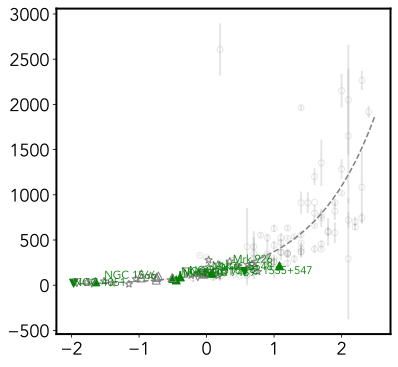

In [31]:
from adjustText import adjust_text

fig = plt.figure(figsize=(6, 6))
#fig.subplots_adjust(left=0.1, right=0.85, bottom=0.12, top=0.95)
ax=fig.add_subplot(1,1,1)
#ax.set_title('NGC1566_V')


Lagnrange=np.logspace(-2.0,2.5)
tau_Lagn= (Lagnrange)**(0.47)*10**2.1

tau_Lagn_slope5= (Lagnrange)**(0.5)*10**2.1


        
lagdata_thiswork_O=lagdata_thiswork[lagdata_thiswork['type']=='O']
lagdata_thiswork_O=drop_index(lagdata_thiswork_O)
lagdata_thiswork_X=lagdata_thiswork[lagdata_thiswork['type']=='X']
lagdata_thiswork_X=drop_index(lagdata_thiswork_X)

ax.errorbar(x=lagdata_thiswork_O['logLbol11'],
            y=lagdata_thiswork_O['tau'],
            yerr=[lagdata_thiswork_O['e_tau'],lagdata_thiswork_O['E_tau']],
            ms=8., mew=1, color='g',
            elinewidth=2,fmt='s',ls='',label='O-CLAGN',
            #fillstyle='none',
            marker='^',zorder=2)


ax.errorbar(x=lagdata_thiswork_X['logLbol11'],
            y=lagdata_thiswork_X['tau'],
            yerr=[lagdata_thiswork_X['e_tau'],lagdata_thiswork_X['E_tau']],
            ms=8., mew=1, color='g',
            elinewidth=2,fmt='s',ls='',label='X-CLAGN',
            #fillstyle='none',
            marker='v',zorder=2)

texts = [ax.text(lagdata_thiswork_O['logLbol11'][i], lagdata_thiswork_O['tau'][i],
         lagdata_thiswork_O['Name'][i],fontsize=11,
         color='green') for i in range(len(lagdata_thiswork_O))]

adjust_text(texts,ax=ax,#arrowprops=dict(arrowstyle='->', color='red',lw=0.5),
            expand_text=(1.3,1.2),
            expand_points=(1.5,1.2),
            expand_objects=(1.5, 1.2),
            expand_align=(1.5, 1.2),
            autoalign='xy',
           #only_move={'points':'x', 'text':'x'}
           ) #使用adjust_text


texts_X = [ax.text(lagdata_thiswork_X['logLbol11'][i], lagdata_thiswork_X['tau'][i]-30,
         lagdata_thiswork_X['Name'][i],fontsize=11,
         color='green') for i in range(len(lagdata_thiswork_X))]

'''adjust_text(texts_X,ax=ax,#arrowprops=dict(arrowstyle='->', color='red',lw=0.5),
            expand_text=(0.8,0.8),
            expand_points=(0.8,0.8),
            expand_objects=(0.8,0.8),
            expand_align=(0.8,0.8),
            autoalign='xy',
           #only_move={'points':'x', 'text':'x'}
           ) #使用adjust_text'''


#lagdata_14_Sy1_WA=lagdata_14_Sy1_WA.sort_values('type')

for i in range(len(lagdata_14_Sy1_WA)):
    if lagdata_14_Sy1_WA['type'][i]=='O':
        color='grey'
        label='O-CLAGN'
        marker='^'
    elif lagdata_14_Sy1_WA['type'][i]=='X':
        color='grey'
        label='X-CLAGN'
        marker='v'
    elif lagdata_14_Sy1_WA['type'][i]=='Type1':
        color='grey'
        label='Type1'
        marker='*'
    
    x=lagdata_14_Sy1_WA['logLbol11'][i]
    y=lagdata_14_Sy1_WA['tau'][i]
    
    if label!='Type1':
        ax.errorbar(x,y,ms=8., mew=1, capsize=0,mec=color,ecolor=color,
            elinewidth=2,ls='',fillstyle='none',marker=marker,label=label)
    
for i in range(len(lagdata_14_Sy1_WA)):
    if lagdata_14_Sy1_WA['type'][i]=='O':
        color='grey'
        label='O-CLAGN'
        marker='^'
    elif lagdata_14_Sy1_WA['type'][i]=='X':
        color='grey'
        label='X-CLAGN'
        marker='v'
    elif lagdata_14_Sy1_WA['type'][i]=='Type1':
        color='grey'
        label='Type1'
        marker='*'
    
    x=lagdata_14_Sy1_WA['logLbol11'][i]
    y=lagdata_14_Sy1_WA['tau'][i] 
    
    if label=='Type1':
        ax.errorbar(x,y,ms=8., mew=1, capsize=0,mec=color,ecolor=color,
            elinewidth=2,ls='',fillstyle='none',marker=marker,label=label)    
################
for i in range(len(lagdata_19_Sy1)):
    if lagdata_19_Sy1['type'][i]=='O':
        color='grey'
        label='O-CLAGN'
        marker='^'
    elif lagdata_19_Sy1['type'][i]=='X':
        color='grey'
        label='X-CLAGN'
        marker='v'
    elif lagdata_19_Sy1['type'][i]=='Type1':
        color='grey'
        label='Type1'
        marker='*'
    
    x=lagdata_19_Sy1['logLbol11'][i]
    y=lagdata_19_Sy1['tau'][i]
    

    ax.errorbar(x,y,ms=8., mew=1, capsize=0,mec=color,ecolor=color,
            elinewidth=2,ls='',fillstyle='none',marker=marker,label=label)

         
    
       #[[timelag_sources['lag_lower'][i]],[timelag_sources['lag_upper'][i]]]   
            

ax.errorbar(x=lagdata_others['logLbol11'],
            y=lagdata_others['tau'],yerr=lagdata_others['e_tau'],
            marker='s',ms=8., mew=2, capsize=0,mec='grey',ecolor='grey',
            elinewidth=1,fmt='o',ls='',fillstyle='none',
            label='Type 2',color='grey',zorder=2) 


################################################################################### 
ax.errorbar(np.log10(Lagnrange),tau_Lagn,ls='--',label='PG quasars',color='grey',zorder=0) 
#ax.errorbar(np.log10(Lagnrange),tau_Lagn_slope5,ls='-.',label='',color='cyan',zorder=0) 

ax.errorbar(x=lagdata_PGQuasar['logLbol11'],
            y=lagdata_PGQuasar['tau'],yerr=lagdata_PGQuasar['e_tau'],
            marker='o',ms=6., mew=1, capsize=0,mec='grey',ecolor='grey',
            elinewidth=2,fmt='o',ls='',fillstyle='none',
            label='PG quasars',color='grey',alpha=0.2,zorder=0) 


x_lin = np.linspace(-2, 1, 100)
band = PredictionBand(x_lin)
band_lo = PredictionBand(x_lin)
band_hi = PredictionBand(x_lin)

for params in sampler_RL.results['samples'][:100]:
    slope, offset, scatter = params
    y_lin = (x_lin) * slope + offset
    band.add(10**y_lin)

    # indicate intrinsic scatter
    band_hi.add(10**(y_lin + scatter))
    band_lo.add(10**(y_lin - scatter))
    
band.shade(color='k', alpha=0.1)
band.line(color='k')
'''band_lo.line(color='r', ls='--')
band_hi.line(color='r', ls='--')
'''
################################################################################################ 
set_ax_tick(ax)
ax.grid(alpha=0.1,which='major',linestyle='--',linewidth=1)
#ax.set_xlim(timerangel,timeranger)
#ax.set_xlim(-2.5,2.5)
#ax.set_ylim(20,300)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl = [h[0] for h in handles]
labels_dict=dict(zip(labels, hdl)) #key,values

by_label = OrderedDict(zip(labels, hdl)) 
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


ax.semilogy()
#ax.semilogx()
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))
#plt.title(r'$\tau$- $L_{bol}$')        
ax.set_ylabel(r'$\tau(days)$')
ax.set_xlabel(r'log$L_{bol}(10^{11}L_{\odot})$')
png_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/'
fig.savefig('%s/tau_L_correlation_type.png'%png_dir,dpi=400,transparent=False,bbox_inches='tight')

In [473]:
lagdata_PGQuasar.columns

Index(['Name', 'tau', 'e_tau', 'E_tau', 'logLbol11', 'ref', 'type'], dtype='object')

## lagdata_append

In [560]:
lagdata_append=pd.DataFrame([])
lagdata_append= lagdata_append.append(lagdata_others,ignore_index=True)
lagdata_append= lagdata_append.append(lagdata_thiswork,ignore_index=True)
lagdata_append= lagdata_append.append(lagdata_14_Sy1_WA,ignore_index=True)
lagdata_append= lagdata_append.append(lagdata_19_Sy1,ignore_index=True)

In [561]:
lagdata_append

Name      tau  e_tau  E_tau  logLbol11    type  \
0          NGC 2110    127.5   13.7   14.0  -0.046413  Type 2   
1          NGC 1566     37.1   11.9   25.7  -1.642954       O   
2             Mrk 6    142.1   11.5   30.0   0.008093       O   
3           Mrk 926    213.8   31.0   25.3   1.079786       O   
4       PG 1535+547    153.2   25.3   21.2   0.563156       X   
5          NGC 7469    131.2   22.4   37.9  -0.052772       O   
6           Mrk 335    278.5    5.6    5.6   0.030432   Type1   
7           Mrk 590  56.3333    4.2    4.2  -0.745568       O   
8   IRAS 03450+0055  263.833    5.4    5.4   0.342432   Type1   
9           Akn 120  234.833   17.2   17.2   0.670432   Type1   
10   MCG +08-11-011    122.5    1.4    1.4  -0.121568   Type1   
11           Mrk 79  109.333    5.0    5.0  -0.229568   Type1   
12          Mrk 110    199.5    5.5    5.5   0.030432   Type1   
13         NGC 3227  24.3333    0.7    0.7  -1.397568   Type1   
14         NGC 3516  121.833    4.0    4.0  -0.965568       O   
15          Mrk 744  33.3333    2.2    2.2  -1.773568   Type1   
16         NGC 4051     27.5    0.6    0.6  -1.921568       X   
17         NGC 4151     80.5    0.5    0.5  -0.965568       O   
18         NGC 4593  69.3333    0.9    0.9  -1.049568   Type1   
19         NGC 5548    101.5    0.3    0.3  -0.713568       O   
20          Mrk 817      155    8.9    8.9   0.122432   Type1   
21          Mrk 509  201.167    1.8    1.8   0.630432   Type1   
22         NGC 7469  146.667    0.6    0.6  -0.305568       X   
23          Mrk 335    229.5    0.0    0.0   0.170000   Type1   
24  IRAS 03450+0055  215.167    0.0    0.0   0.460000   Type1   
25   MCG +08-11-011  149.167    0.0    0.0   0.760000   Type1   
26           Mrk 79  124.333    0.0    0.0  -0.070000   Type1   
27          Mrk 110  106.167    0.0    0.0   0.170000   Type1   
28         NGC 3227  11.6667    0.0    0.0  -1.150000   Type1   
29         NGC 3516  89.3333    0.0    0.0  -0.740000       O   
30          Mrk 744  44.3333    0.0    0.0  -1.520000   Type1   
31         NGC 4051     21.5    0.0    0.0  -1.700000       X   
32         NGC 4151       87    0.0    0.0  -0.740000       O   
33         NGC 4593    103.5    0.0    0.0  -0.830000   Type1   
34         NGC 5548  84.1667    0.0    0.0  -0.510000       O   
35          Mrk 817  152.667    0.0    0.0   0.260000   Type1   
36          Mrk 509  203.667    0.0    0.0   0.710000   Type1   
37         NGC 7469     93.5    0.0    0.0  -0.130000       X   

                    ref  
0   2020MNRAS.495.2921N  
1              Thiswork  
2              Thiswork  
3              Thiswork  
4              Thiswork  
5              Thiswork  
6                 14Sy1  
7                 14Sy1  
8                 14Sy1  
9                 14Sy1  
10                14Sy1  
11                14Sy1  
12                14Sy1  
13                14Sy1  
14                14Sy1  
15                14Sy1  
16                14Sy1  
17                14Sy1  
18                14Sy1  
19                14Sy1  
20                14Sy1  
21                14Sy1  
22                14Sy1  
23                19Sy1  
24                19Sy1  
25                19Sy1  
26                19Sy1  
27                19Sy1  
28                19Sy1  
29                19Sy1  
30                19Sy1  
31                19Sy1  
32                19Sy1  
33                19Sy1  
34                19Sy1  
35                19Sy1  
36                19Sy1  
37                19Sy1

In [563]:
lagdata_append=lagdata_append.sort_values('type')
lagdata_append=drop_index(lagdata_append)
for index, e_tau in enumerate(lagdata_append['e_tau']):
    if e_tau==0:
        lagdata_append.loc[index,'e_tau']=lagdata_append.loc[index,'tau']*0.10      

In [564]:
lagdata_append.to_csv('%s/lagdata_append.csv'%png_dir)

In [566]:
lagdata_CLAGN=lagdata_append[lagdata_append['type'].str.contains('Type')==False]
lagdata_CLAGN=drop_index(lagdata_CLAGN)

In [568]:
lagdata_CLAGN

Name      tau      e_tau  E_tau  logLbol11 type       ref
0      NGC 1566     37.1  11.900000   25.7  -1.642954    O  Thiswork
1         Mrk 6    142.1  11.500000   30.0   0.008093    O  Thiswork
2       Mrk 926    213.8  31.000000   25.3   1.079786    O  Thiswork
3      NGC 7469    131.2  22.400000   37.9  -0.052772    O  Thiswork
4      NGC 5548  84.1667   8.416667    0.0  -0.510000    O     19Sy1
5       Mrk 590  56.3333   4.200000    4.2  -0.745568    O     14Sy1
6      NGC 4151     80.5   0.500000    0.5  -0.965568    O     14Sy1
7      NGC 4151       87   8.700000    0.0  -0.740000    O     19Sy1
8      NGC 5548    101.5   0.300000    0.3  -0.713568    O     14Sy1
9      NGC 3516  89.3333   8.933333    0.0  -0.740000    O     19Sy1
10     NGC 3516  121.833   4.000000    4.0  -0.965568    O     14Sy1
11     NGC 7469  146.667   0.600000    0.6  -0.305568    X     14Sy1
12     NGC 4051     27.5   0.600000    0.6  -1.921568    X     14Sy1
13     NGC 4051     21.5   2.150000    0.0  -1.700000    X     19Sy1
14  PG 1535+547    153.2  25.300000   21.2   0.563156    X  Thiswork
15     NGC 7469     93.5   9.350000    0.0  -0.130000    X     19Sy1

## fit RL

x_RL=lagdata_append['logLbol11']
y_RL=[]
yerr_RL=[]
xerr_RL=(lagdata_append['logLbol11']+11)*0.01

for i,j in zip(lagdata_append['tau'],lagdata_append['e_tau']):
    y_RL.append(np.log10(i))
    yerr_RL.append(j/i/np.log(10))
    
x_RL=np.array(x_RL)    
y_RL=np.array(y_RL)    
yerr_RL=np.array(yerr_RL)  
xerr_RL=np.array(xerr_RL)
plt.errorbar(x_RL, y_RL, xerr=xerr_RL,yerr=yerr_RL, fmt='.k', ecolor='gray');

## fit RL thiswork

### lagdata_thiswork

In [90]:
timelag_sources.columns

Index(['Name', 'z', 'type', 'logmass', 'epoch', 'Lsigma_lo', 'Lbol',
       'Lsigma_hi', 'band', 'refband', 'lag_lower', 'timelag', 'lag_upper',
       'ref', 'bol_method', 'select', 'Note', 'Lbol11', 'logLbol11', 'color',
       'label', 'OX'],
      dtype='object')

In [91]:
lagdata_thiswork=pd.DataFrame([])
lagdata_thiswork['Name']=timelag_sources['Name']
lagdata_thiswork['tau']=timelag_sources['timelag']
lagdata_thiswork['e_tau']=timelag_sources['lag_lower']
lagdata_thiswork['E_tau']=timelag_sources['lag_upper']
lagdata_thiswork['Lbol']=timelag_sources['Lbol']
lagdata_thiswork['e_Lbol']=timelag_sources['Lsigma_lo']
lagdata_thiswork['E_Lbol']=timelag_sources['Lsigma_hi']

lagdata_thiswork['logLbol']=np.log10(timelag_sources['Lbol'])
lagdata_thiswork['logLbol11']=timelag_sources['logLbol11']

lagdata_thiswork['type']=timelag_sources['OX']
lagdata_thiswork['ref']=timelag_sources['ref']
#lagdata_thiswork['CLAGN']=timelag_sources['CLAGN']

lagdata_thiswork['e_logL']=lagdata_thiswork['e_Lbol']/lagdata_thiswork['Lbol']/np.log(10)
lagdata_thiswork['E_logL']=lagdata_thiswork['E_Lbol']/lagdata_thiswork['Lbol']/np.log(10)

In [92]:
lagdata_thiswork

Name    tau  e_tau  E_tau          Lbol        e_Lbol        E_Lbol  \
0     NGC 1566   37.1   11.9   25.7  8.710000e+42  8.290000e+41  8.740000e+41   
1        Mrk 6  142.1   11.5   30.0  3.900000e+44  2.000000e+43  1.560000e+43   
2      Mrk 926  213.8   31.0   25.3  4.590000e+45  1.170000e+44  1.100000e+44   
3  PG 1535+547  153.2   25.3   21.2  1.400000e+45  1.400000e+44  1.400000e+44   
4     NGC 7469  131.2   22.4   37.9  3.390000e+44  1.250000e+43  1.160000e+43   
5     NGC 3516   91.1   31.4   64.0  1.560000e+44  3.100000e+42  3.250000e+42   
6      Mrk 590   57.9   20.0   17.8  1.360000e+44  3.400000e+43  3.140000e+43   
7     NGC 4051   22.3   10.0   10.4  4.100000e+42  1.670000e+41  1.360000e+41   
8     NGC 4151   74.4   19.5   40.8  1.210000e+44  4.910000e+41  4.770000e+41   
9     NGC 5548  131.2   32.2   18.6  4.600000e+44  1.210000e+43  1.250000e+43   

     logLbol  logLbol11 type       ref  
0  42.940018  -1.642954    O  Thiswork  
1  44.591065   0.008093    O  Thiswork  
2  45.661813   1.078841    O  Thiswork  
3  45.146128   0.563156    X  Thiswork  
4  44.530200  -0.052772    X  Thiswork  
5  44.193125  -0.389847    O  Thiswork  
6  44.133539  -0.449433    O  Thiswork  
7  42.612784  -1.970188    X  Thiswork  
8  44.082785  -0.500187    O  Thiswork  
9  44.662758   0.079786    O  Thiswork

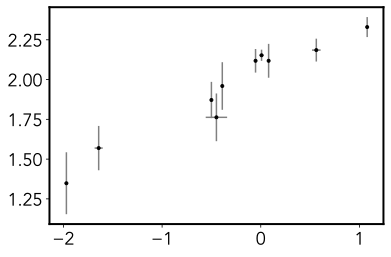

In [162]:
x_RL=lagdata_thiswork['logLbol11']
y_RL=[]
yerr_RL=[]
xerr_RL=[]

for k,m in zip(lagdata_thiswork['Lbol'],lagdata_thiswork['e_Lbol']):
    xerr_RL.append(m/k/np.log(10))

for i,j in zip(lagdata_thiswork['tau'],lagdata_thiswork['e_tau']):
    y_RL.append(np.log10(i))
    yerr_RL.append(j/i/np.log(10))

x_RL=np.array(x_RL)
y_RL=np.array(y_RL)
yerr_RL=np.array(yerr_RL)
xerr_RL=np.array(xerr_RL)
plt.errorbar(x_RL, y_RL, xerr=xerr_RL,yerr=yerr_RL, fmt='.k', ecolor='gray');


In [163]:
xerr_RL

array([0.04133526, 0.02227151, 0.01107025, 0.04342945, 0.01601381,
       0.00863021, 0.10857362, 0.01768956, 0.0017623 , 0.01142383])

## pearsonr spearmanr

In [33]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#

In [96]:
pearsonr(x_RL,y_RL)

(0.9673236572225545, 4.7949016454471245e-06)

In [160]:
spearmanr(x_RL,y_RL)

SpearmanrResult(correlation=0.9665698144513026, pvalue=5.248115668648561e-06)

Text(0, 0.5, 'logtau')

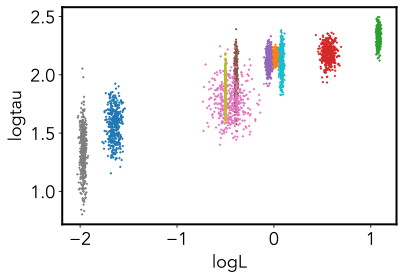

In [105]:
samples_RL = []
n_data=len(x_RL)
plt.figure()
for i in range(len(x_RL)):
    # draw normal random points

    # scale according to error bars and values
    samples_logL = np.random.normal(x_RL[i], xerr_RL[i], size=400)

    # same for logtau
    samples_logtau = np.random.normal(y_RL[i], yerr_RL[i], size=400)



    samples_RL.append([samples_logL, samples_logtau])

    # for each galaxy, plot alittle cloud with its own colors
    plt.scatter(samples_logL, samples_logtau, s=2, marker='x')

samples_RL = np.array(samples_RL)
xlabel = 'logL'
ylabel = 'logtau'
plt.xlabel(xlabel)
plt.ylabel(ylabel)

## def prior_transform_RL

In [154]:
import scipy.stats

parameters = ['slope', 'offset', 'scatter']

def prior_transform_RL(cube):
    # the argument, cube, consists of values from 0 to 1
    # we have to convert them to physical scales

    params = cube.copy()
    # let slope go from -3 to +3
    lo = 0.1
    hi = 0.9
    params[0] = cube[0] * (hi - lo) + lo
    # let offset go from 10 to 1000 km/s -- use log
    lo = -3
    hi = 3
    params[1] = cube[1] * (hi - lo) + lo
    # let scatter go from 0.001 to 10
    lo = -1#np.log10(0.001)
    hi = 0.3 #np.log10(10)
    params[2] = 10**(cube[2] * (hi - lo) + lo)
    return params


def log_likelihood_RL(params):
    # unpack the current parameters:
    slope, offset, scatter = params

    # compute for each x point, where it should lie in y
    y_expected = (samples_RL[:,0]) * slope + offset
    # compute the probability of each sample
    probs_samples = scipy.stats.norm(y_expected, scatter).pdf(samples_RL[:,1])
    # average over each galaxy, because we assume one of the points is the correct one (logical OR)
    probs_objects = probs_samples.mean(axis=1)
    assert len(probs_objects) == len(x_RL)
    # multiply over the galaxies, because we assume our model holds true for all objects (logical AND)
    # for numerical stability, we work in log and avoid zeros
    loglike = np.log(probs_objects + 1e-100).sum()
    return loglike

In [155]:
import ultranest
sampler_RL = ultranest.ReactiveNestedSampler(parameters, log_likelihood_RL, prior_transform_RL)

In [156]:
result_RL = sampler_RL.run(min_num_live_points=50, min_ess=100) # you can increase these numbers later

[ultranest] To achieve the desired logz accuracy, min_num_live_points was increased to 64
[ultranest] Sampling 64 live points from prior ...


[ultranest] Explored until L=8  [8.3162..8.3641] | it/evals=840/2023 eff=42.8790% N=64    4 =64 
[ultranest] Likelihood function evaluations: 2041
[ultranest] Will add 16 live points (x1) at L=5 ...
[ultranest] Explored until L=8  [8.3162..8.3652] | it/evals=889/2181 eff=42.8571% N=80  
[ultranest] Likelihood function evaluations: 2181
[ultranest]   logZ = 0.08829 +- 0.2617
[ultranest] Effective samples strategy satisfied (ESS = 379.9, need >100)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 31 minimum live points (dlogz from 0.21 to 0.59, need <0.5)
[ultranest]   logZ error budget: single: 0.28 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.


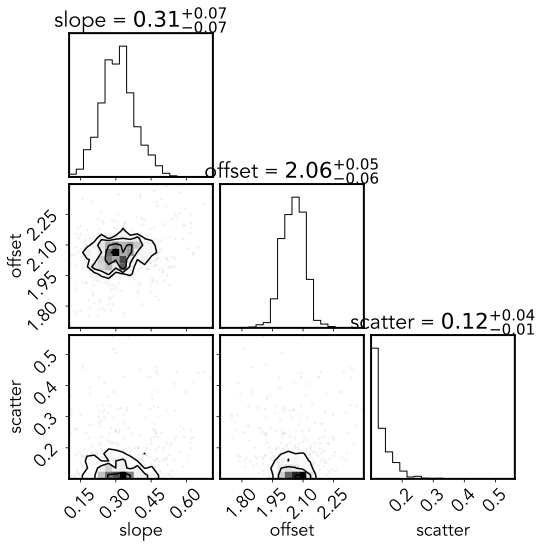

In [157]:
from ultranest.plot import cornerplot
cornerplot(sampler_RL.results)

### plot_RL

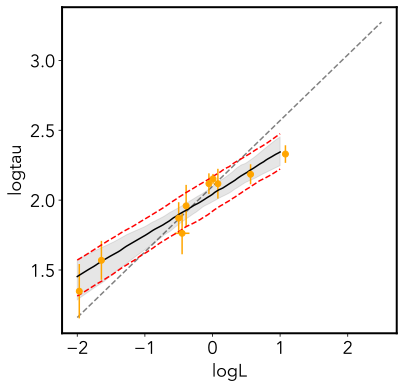

In [158]:
fig = plt.figure(figsize=(6, 6))
#fig.subplots_adjust(left=0.1, right=0.85, bottom=0.12, top=0.95)
ax=fig.add_subplot(1,1,1)
#ax.set_title('NGC1566_V')

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.errorbar(x=x_RL, xerr=xerr_RL, y=y_RL, yerr=yerr_RL,
             marker='o', ls=' ', color='orange')

plt.errorbar(np.log10(Lagnrange),np.log10(tau_Lagn),ls='--',label='PG quasars',color='grey',zorder=0) 


from ultranest.plot import PredictionBand
x_lin = np.linspace(-2, 1, 100)
band = PredictionBand(x_lin)
band_lo = PredictionBand(x_lin)
band_hi = PredictionBand(x_lin)

for params in sampler_RL.results['samples'][:100]:
    slope, offset, scatter = params
    y_lin = (x_lin) * slope + offset
    band.add(y_lin)

    # indicate intrinsic scatter
    band_hi.add((y_lin + scatter))
    band_lo.add((y_lin - scatter))

band.shade(color='k', alpha=0.1)
band.line(color='k')
band_lo.line(color='r', ls='--')
band_hi.line(color='r', ls='--')

#plt.yscale('log');


In [579]:
sampler_RL.results['samples'][:40][0]

array([0.25123239, 2.04715389, 0.17211996])

In [161]:
from IPython.display import display, Math


labels_RL = [ "slope","intercept",'scatter']

for i in range(3):
    mcmc = np.percentile(sampler_RL.results['samples'][-10000:][:,i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.2f}_{{-{1:.2f}}}^{{+{2:.2f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels_RL[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## plot tau-L

### only CLAGN thiswork

In [113]:
lagdata_thiswork.columns

Index(['Name', 'tau', 'e_tau', 'E_tau', 'Lbol', 'e_Lbol', 'E_Lbol', 'logLbol',
       'logLbol11', 'type', 'ref'],
      dtype='object')

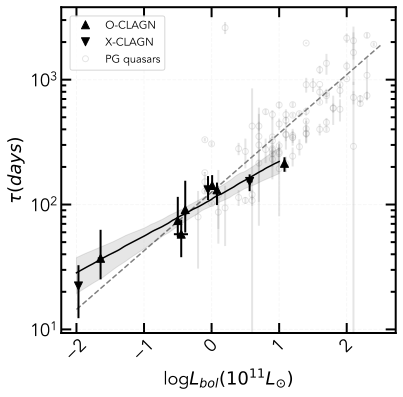

In [159]:
from adjustText import adjust_text

fig = plt.figure(figsize=(6, 6))
#fig.subplots_adjust(left=0.1, right=0.85, bottom=0.12, top=0.95)
ax=fig.add_subplot(1,1,1)
#ax.set_title('NGC1566_V')


Lagnrange=np.logspace(-2.0,2.5)
tau_Lagn= (Lagnrange)**(0.47)*10**2.1

tau_Lagn_slope5= (Lagnrange)**(0.5)*10**2.1


        
lagdata_thiswork_O=lagdata_thiswork[lagdata_thiswork['type']=='O']
lagdata_thiswork_O=drop_index(lagdata_thiswork_O)
lagdata_thiswork_X=lagdata_thiswork[lagdata_thiswork['type']=='X']
lagdata_thiswork_X=drop_index(lagdata_thiswork_X)

ax.errorbar(x=lagdata_thiswork_O['logLbol11'],
            xerr=[lagdata_thiswork_O['e_logL'],lagdata_thiswork_O['E_logL']],
            y=lagdata_thiswork_O['tau'],
            yerr=[lagdata_thiswork_O['e_tau'],lagdata_thiswork_O['E_tau']],
            ms=8., mew=1, color='black',
            elinewidth=2,fmt='s',ls='',label='O-CLAGN',
            #fillstyle='none',
            marker='^',zorder=2)


ax.errorbar(x=lagdata_thiswork_X['logLbol11'],
            xerr=[lagdata_thiswork_X['e_logL'],lagdata_thiswork_X['E_logL']],
            y=lagdata_thiswork_X['tau'],
            yerr=[lagdata_thiswork_X['e_tau'],lagdata_thiswork_X['E_tau']],
            ms=8., mew=1, color='black',
            elinewidth=2,fmt='s',ls='',label='X-CLAGN',
            #fillstyle='none',
            marker='v',zorder=2)

'''for i in range(len(lagdata_thiswork_O)):
    if lagdata_thiswork_O['Name'][i]=='Mrk 6':
        delta_y=30
    elif lagdata_thiswork_O['Name'][i]=='NGC 7469': 
        delta_y=-30
    else:
        delta_y=0
        
    ax.text(lagdata_thiswork_O['logLbol11'][i], lagdata_thiswork_O['tau'][i]+delta_y,
         lagdata_thiswork_O['Name'][i],fontsize=11,
         color='green')
'''    


'''adjust_text(texts,ax=ax,#arrowprops=dict(arrowstyle='->', color='red',lw=0.5),
            expand_text=(1.2,1.2),
            expand_points=(1.2,1.2),
            expand_objects=(1.2, 1.2),
            expand_align=(1.2, 1.2),
            autoalign='xy',
           #only_move={'points':'x', 'text':'x'}
           ) #使用adjust_text
'''

'''texts_X = [ax.text(lagdata_thiswork_X['logLbol11'][i], lagdata_thiswork_X['tau'][i]-30,
         lagdata_thiswork_X['Name'][i],fontsize=11,
         color='green') for i in range(len(lagdata_thiswork_X))]
'''

'''for i in range(len(lagdata_14_Sy1_WA)):
    if lagdata_14_Sy1_WA['type'][i]=='O':
        color='grey'
        label='O-CLAGN'
        marker='^'
    elif lagdata_14_Sy1_WA['type'][i]=='X':
        color='grey'
        label='X-CLAGN'
        marker='v'
    elif lagdata_14_Sy1_WA['type'][i]=='Type1':
        color='grey'
        label='Type1'
        marker='*'
    
    x=lagdata_14_Sy1_WA['logLbol11'][i]
    y=lagdata_14_Sy1_WA['tau'][i]
    
    if label!='Type1':
        ax.errorbar(x,y,ms=8., mew=1, capsize=0,mec=color,ecolor=color,
            elinewidth=2,ls='',fillstyle='none',marker=marker,label=label)
    
################
for i in range(len(lagdata_19_Sy1)):
    if lagdata_19_Sy1['type'][i]=='O':
        color='grey'
        label='O-CLAGN'
        marker='^'
    elif lagdata_19_Sy1['type'][i]=='X':
        color='grey'
        label='X-CLAGN'
        marker='v'
    elif lagdata_19_Sy1['type'][i]=='Type1':
        color='grey'
        label='Type1'
        marker='*'
    
    x=lagdata_19_Sy1['logLbol11'][i]
    y=lagdata_19_Sy1['tau'][i]
    
    if label!='Type1':
        ax.errorbar(x,y,ms=8., mew=1, capsize=0,mec=color,ecolor=color,
            elinewidth=2,ls='',fillstyle='none',marker=marker,label=label)
'''
         
    

################################################################################### 
ax.errorbar(np.log10(Lagnrange),tau_Lagn,ls='--',label='PG quasars',color='grey',zorder=0) 
#ax.errorbar(np.log10(Lagnrange),tau_Lagn_slope5,ls='-.',label='',color='cyan',zorder=0) 

ax.errorbar(x=lagdata_PGQuasar['logLbol11'],
            y=lagdata_PGQuasar['tau'],yerr=lagdata_PGQuasar['e_tau'],
            marker='o',ms=6., mew=1, capsize=0,mec='grey',ecolor='grey',
            elinewidth=2,fmt='o',ls='',fillstyle='none',
            label='PG quasars',color='grey',alpha=0.2,zorder=0) 

x_lin = np.linspace(-2, 1, 100)
band = PredictionBand(x_lin)
band_lo = PredictionBand(x_lin)
band_hi = PredictionBand(x_lin)

for params in sampler_RL.results['samples'][:100]:
    slope, offset, scatter = params
    y_lin = (x_lin) * slope + offset
    band.add(10**y_lin)

    # indicate intrinsic scatter
    band_hi.add(10**(y_lin + scatter))
    band_lo.add(10**(y_lin - scatter))
    
band.shade(color='k', alpha=0.1)
band.line(color='k')

################################################################################################ 
set_ax_tick(ax)
ax.grid(alpha=0.1,which='major',linestyle='--',linewidth=1)
#ax.set_xlim(timerangel,timeranger)
#ax.set_xlim(-2.5,2.5)
#ax.set_ylim(20,300)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
hdl = [h[0] for h in handles]
labels_dict=dict(zip(labels, hdl)) #key,values

by_label = OrderedDict(zip(labels, hdl)) 
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


ax.semilogy()
#ax.semilogx()
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))
#plt.title(r'$\tau$- $L_{bol}$')        
ax.set_ylabel(r'$\tau(days)$')
ax.set_xlabel(r'log$L_{bol}(10^{11}L_{\odot})$')
png_dir='/Volumes/ExtremeSSD/CLAGN_statistic_plot/'
fig.savefig('%s/tau_L_correlation_clagn.png'%png_dir,dpi=400,transparent=False,bbox_inches='tight')

# plotMCMC

In [581]:
# Create some convenience routines for plotting

def compute_sigma_level(trace1, trace2, nbins=20):
    """From a set of traces, bin by number of standard deviations"""
    L, xbins, ybins = np.histogram2d(trace1, trace2, nbins)
    L[L == 0] = 1E-16
    logL = np.log(L)

    shape = L.shape
    L = L.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(L)[::-1]
    i_unsort = np.argsort(i_sort)

    L_cumsum = L[i_sort].cumsum()
    L_cumsum /= L_cumsum[-1]
    
    xbins = 0.5 * (xbins[1:] + xbins[:-1])
    ybins = 0.5 * (ybins[1:] + ybins[:-1])

    return xbins, ybins, L_cumsum[i_unsort].reshape(shape)


def plot_MCMC_trace(ax, xdata, ydata, trace, scatter=False, **kwargs):
    """Plot traces and contours"""
    xbins, ybins, sigma = compute_sigma_level(trace[0], trace[1])
    ax.contour(xbins, ybins, sigma.T, levels=[0.683, 0.955], **kwargs)
    if scatter:
        ax.plot(trace[0], trace[1], ',k', alpha=0.1)
    #ax.set_xlabel(r'$\alpha$')
    #ax.set_ylabel(r'$\beta$')
    ax.set_xlabel('intercept')
    ax.set_ylabel('slope');    
    
def plot_MCMC_model(ax, xdata, ydata, trace,xfit_min,xfit_max,xlim,ylim):
    """Plot the linear model and 2sigma contours"""
    ax.plot(xdata, ydata, 'ok')

    alpha, beta = trace[:2]
    xfit = np.linspace(xfit_min,xfit_max, 10)
    yfit = alpha[:, None] + beta[:, None] * xfit
    mu = yfit.mean(0)
    sig = 2 * yfit.std(0)

    ax.plot(xfit, mu, '-k')
    ax.fill_between(xfit, mu - sig, mu + sig, color='lightgray')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


def plot_MCMC_results(xdata, ydata, trace,xlim,ylim, colors='k',xfit_min=-20,xfit_max=120,):
    """Plot both the trace and the model together"""

    plot_MCMC_trace(ax[0], xdata, ydata, trace, True, colors=colors)
    plot_MCMC_model(ax[1], xdata, ydata, trace,xfit_min,xfit_max,xlim,ylim)

## fit with outlier

In [270]:
def log_prior_outlier(theta):
    #g_i needs to be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf

def log_likelihood_outlier(theta, x, y, e, sigma_B):
    dy = y - theta[0] - theta[1] * x
    g = np.clip(theta[2:], 0, 1)  # g<0 or g>1 leads to NaNs in logarithm
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))

def log_posterior_outlier(theta, x, y, e, sigma_B):
    return log_prior_outlier(theta) + log_likelihood_outlier(theta, x, y, e, sigma_B)



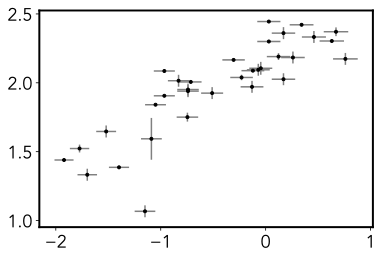

In [263]:
x_RL=lagdata_append['logLbol11']
y_RL=[]
yerr_RL=[]
xerr_RL=(lagdata_append['logLbol11']+11)*0.01

for i,j in zip(lagdata_append['tau'],lagdata_append['e_tau']):
    y_RL.append(np.log10(i))
    yerr_RL.append(j/i/np.log(10))
    
x_RL=np.array(x_RL)    
y_RL=np.array(y_RL)    
yerr_RL=np.array(yerr_RL)  
xerr_RL=np.array(xerr_RL)
plt.errorbar(x_RL, y_RL, xerr=xerr_RL,yerr=yerr_RL, fmt='.k', ecolor='gray');  
#plt.errorbar(x, y, e, fmt='.k', ecolor='gray');

In [264]:
len(x_RL)

33

In [271]:
from scipy import optimize

def squared_loss(theta, x=x_RL, y=y_RL, e=yerr_RL):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy / e) ** 2)

theta1 = optimize.fmin(squared_loss, [0, 0], disp=False)
print(theta1)

[2.2248392  0.31702714]


In [272]:
ndim = 2 + len(x_RL)  # number of parameters in the model
nwalkers = 100  # number of MCMC walkers
nburn = 5000*2  # "burn-in" period to let chains stabilize
nsteps = 10000*2  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior_outlier, args=[x_RL, y_RL, yerr_RL, 10])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

<ipython-input-270-0e7005defd5d>:11: RuntimeWarning: divide by zero encountered in log
  logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
<ipython-input-270-0e7005defd5d>:12: RuntimeWarning: divide by zero encountered in log
  logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2


0.31702714178785263 0.2668890291896289


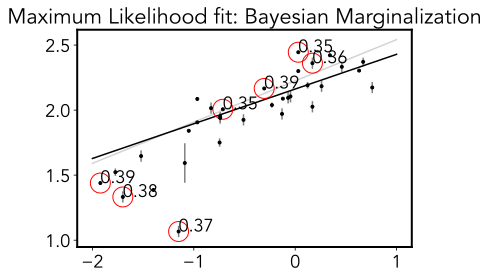

In [304]:
xfit = np.linspace(-2, 1)
theta3 = np.mean(sample[:, :2], 0)
g = np.mean(sample[:, 2:], 0)
outliers = (g < 0.4)

plt.errorbar(x_RL, y_RL, yerr_RL, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray')
#plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='lightgray')
plt.plot(xfit, theta3[0] + theta3[1] * xfit, color='black')
plt.plot(x_RL[outliers], y_RL[outliers], 'ro', ms=20, mfc='none', mec='red')
plt.title('Maximum Likelihood fit: Bayesian Marginalization');

for i,j,g_ in zip(x_RL[outliers],y_RL[outliers],g[outliers]):
    plt.text(i,j,'%.2f'%g_)

print(theta1[1],theta3[1])

In [277]:
from IPython.display import display, Math


flat_samples = sample[:, :2]
labels = ["intercept", "slope",]

for i in range(2):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

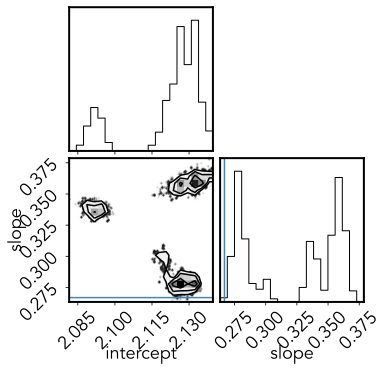

In [278]:
import corner

fig = corner.corner(
    flat_samples[-50000:], labels=labels, truths=[theta3[0],theta3[1]]
);

##  def log_posterior_bestlinefit

In [279]:
def log_prior_bestlinefit(theta):
    alpha, beta, sigma = theta
    if sigma < 0:
        return -np.inf  # log(0)
    else:
        return -1.5 * np.log(1 + beta ** 2) - np.log(sigma)

def log_likelihood_bestlinefit(theta, x, y):
    alpha, beta, sigma = theta
    y_model = alpha + beta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior_bestlinefit(theta, x, y):
    return log_prior_bestlinefit(theta) + log_likelihood_bestlinefit(theta, x, y)

In [280]:
# Here we'll set up the computation. emcee combines multiple "walkers",
# each of which is its own MCMC chain. The number of trace results will
# be nwalkers * nsteps

ndim = 3  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

# Here's the function call where all the work happens:
# we'll time it using IPython's %time magic

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior_bestlinefit, args=[x_RL, y_RL])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")

CPU times: user 4.24 s, sys: 45.9 ms, total: 4.28 s
Wall time: 4.38 s
done


In [282]:
emcee_trace = sampler.chain[:, nburn:, :].reshape(-1, ndim).T
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_MCMC_results(x_RL, y_RL, emcee_trace,(-3,2),(0,3))

In [283]:
emcee_trace.shape

(3, 50000)

In [284]:
from IPython.display import display, Math


labels = ["intercept", "slope",'sigma']

for i in range(3):
    mcmc = np.percentile(emcee_trace[i][-5000:], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Fitting a Model to Data

In [297]:
A = np.vstack((np.ones_like(x_RL), x_RL)).T
C = np.diag(yerr_RL * yerr_RL)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y_RL)))


In [298]:
print(b_ls,m_ls)

2.2248313188857796 0.31702280009080397


In [312]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

def lnprior(theta):
    m, b, lnf = theta
    if -1.0 < m < 1.0 and -10 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [306]:
import scipy.optimize as op

m_true = 0.5
b_true = 2.294
f_true = 0.534

nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x_RL, y_RL, yerr_RL))
m_ml, b_ml, lnf_ml = result["x"]


In [307]:
m_ml, b_ml, lnf_ml

(0.3882259109926175, 2.149337058788982, -2.3745641437379494)

In [310]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [313]:
sampler_fit = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x_RL, y_RL, yerr_RL))

In [315]:
sampler_fit.run_mcmc(pos, 500)

State([[ 0.28071675  2.04048269 -2.29040461]
 [ 0.41775933  2.1811258  -2.3846965 ]
 [ 0.4863186   2.19610795 -2.26901921]
 [ 0.43077251  2.14011886 -2.50421075]
 [ 0.34925627  2.13048649 -2.04835316]
 [ 0.38959851  2.11521513 -2.49947729]
 [ 0.38622231  2.13322647 -2.4138738 ]
 [ 0.36981177  2.10606967 -2.26406615]
 [ 0.41047098  2.15973409 -2.35032074]
 [ 0.34033572  2.10337726 -2.14491108]
 [ 0.39899195  2.1077554  -2.24791087]
 [ 0.38736179  2.07610175 -2.11828484]
 [ 0.32961308  2.09973341 -2.24892347]
 [ 0.38994472  2.16550894 -2.28113912]
 [ 0.4597949   2.18226421 -2.09129482]
 [ 0.43953519  2.17335971 -2.33648235]
 [ 0.41750601  2.1815622  -2.47935917]
 [ 0.37779674  2.09937997 -2.31778945]
 [ 0.27880104  2.16085646 -2.26491135]
 [ 0.41321114  2.23680395 -2.4487371 ]
 [ 0.3198872   2.12671845 -2.43852353]
 [ 0.37989532  2.14044388 -2.13507142]
 [ 0.35211367  2.16568392 -2.22931169]
 [ 0.44521566  2.22779978 -2.39144612]
 [ 0.45324465  2.16432461 -2.30765242]
 [ 0.37918717  2.08

In [316]:
samples_fit = sampler_fit.chain[:, 50:, :].reshape((-1, ndim))

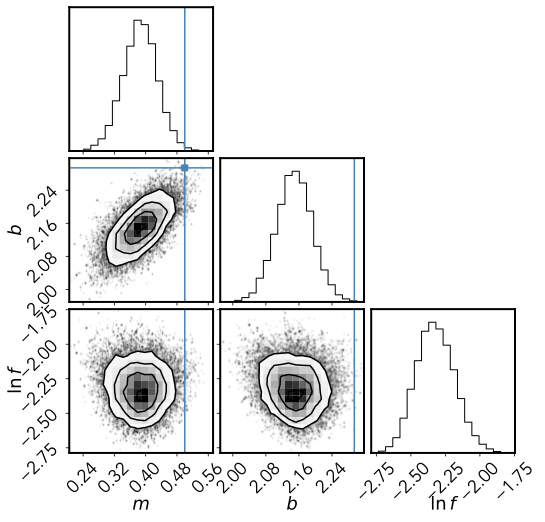

In [318]:
fig = corner.corner(samples_fit, labels=["$m$", "$b$", "$\ln\,f$"],
                      truths=[m_true, b_true, np.log(f_true)])

<ErrorbarContainer object of 3 artists>

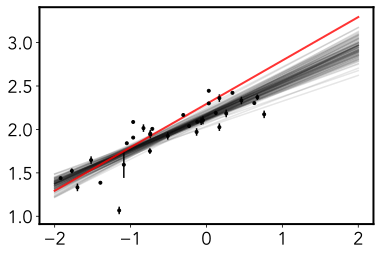

In [320]:
import matplotlib.pyplot as pl
xl = np.array([-2, 2])
for m, b, lnf in samples_fit[np.random.randint(len(samples_fit), size=100)]:
    pl.plot(xl, m*xl+b, color="k", alpha=0.1)
pl.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
pl.errorbar(x_RL, y_RL, yerr=yerr_RL, fmt=".k")

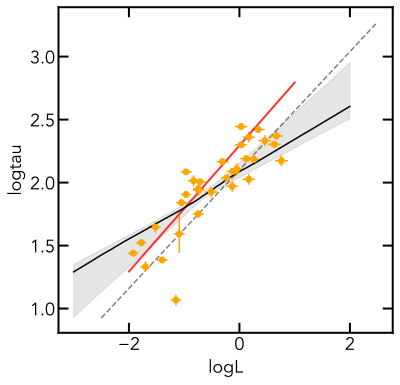

In [334]:
fig = plt.figure(figsize=(6, 6))
#fig.subplots_adjust(left=0.1, right=0.85, bottom=0.12, top=0.95)
ax=fig.add_subplot(1,1,1)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.errorbar(x=x_RL, xerr=xerr_RL, y=y_RL, yerr=yerr_RL,
             marker='o', ls=' ', color='orange')

plt.errorbar(np.log10(Lagnrange),np.log10(tau_Lagn),ls='--',label='PG quasars',color='grey',zorder=0) 

x_lin = np.linspace(-2, 1, 100)

xl = np.array([-2, 1])
pl.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)


for params in samples_fit[-40:]:
    slope, offset, scatter = params
    y_lin = (x_lin) * slope + offset
    band.add(y_lin)

    # indicate intrinsic scatter
    band_hi.add((y_lin + scatter))
    band_lo.add((y_lin - scatter))

band.shade(color='k', alpha=0.1)
band.line(color='k')
#band_lo.line(color='r', ls='--')
#band_hi.line(color='r', ls='--')
set_ax_tick(ax)
#pl.errorbar(x_RL, y_RL, yerr=yerr_RL, fmt=".k")

In [328]:
samples_fit.shape

(45000, 3)

In [321]:
samples_fit[:, 2] = np.exp(samples_fit[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples_fit, [16, 50, 84],
                                                axis=0)))

In [322]:
m_mcmc, b_mcmc, f_mcmc

((0.3862471789772662, 0.04254479312598275, 0.04472465607385806),
 (2.1493825049412436, 0.04255417158819652, 0.04374562239692725),
 (0.09774253265860083, 0.015075480634925836, 0.012390536270503905))

In [327]:
labels_RL = [ "slope","intercept",'scatter']

for i in range(3):
    mcmc = np.percentile(samples_fit[-1000:][:,i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels_RL[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>